In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class NeuralNetwork:
    def __init__(self, input_values, output, hidden_size, alfa, epochs = 300):
        self.input = input_values
        self.output = output
        self.hidden = hidden_size
        self.alfa = alfa
        self.erro = 0.001
        self.epochs = epochs
        
        #Pesos hidden layer
        self.v = np.random.rand(self.input.shape[1], self.hidden) - 0.5
        self.bv = np.random.rand(self.hidden, 1) - 0.5

        self.delta_inv = np.zeros((self.hidden, 1))
        self.delta_v = np.zeros((self.hidden, 1))

        #Pesos camada de saída
        self.w = np.random.rand(self.hidden, self.output.shape[1]) - 0.5
        self.bw = np.random.rand(self.output.shape[1], 1) - 0.5
    
        self.deltinha_w = np.zeros((self.output.shape[1], 1))

    def sigmoid_bipolar(self, z):
        return (2/(1+np.exp(-z))) - 1
    
    def sigmoid_partial(self, z2):
        return (0.5 *(1 + z2)*(1 - z2))
    
    def feed_foward(self, X):
        #self.z_in = np.zeros((1,self.hidden)) #Soma das entradas dos neurônios escondidos
        #self.z = np.zeros((1, self.hidden)) #Saída dos neurônios escondidos 
    
        #Propagando entrada pela rede:
        #XW1 -> Z_in -> sigmoide -> z -> zW2 -> sigmoide -> yhat
        
        self.z_in =  np.dot(X, self.v) + self.bv.T
        self.z =  self.sigmoid_bipolar(self.z_in)
        
        #Cálculo saída da rede
        self.y_in = np.dot(self.z, self.w) + self.bw
        yhat = self.sigmoid_bipolar(self.y_in)
        return yhat
    
    
    def retropropagation(self, X, y):
        yhat = self.feed_foward(X)
        
        #Cálculo delta da camada de saída
        self.deltinha_w = np.multiply((y  -  yhat), self.sigmoid_partial(self.y_in))
        self.dEdW = self.alfa * (np.dot(self.z.T, self.deltinha_w)) #dEdW Atualizando os pesos
        self.dEdBw = self.alfa * self.deltinha_w
    
        #Cálculo delta das hidden layers
        self.delta_inv = np.multiply(self.deltinha_w, self.w.T)
        self.delta_v = np.multiply(self.delta_inv, self.sigmoid_bipolar(self.z))
        
        #Atualização dos pesos das hiden layers
        self.dEdV = self.alfa * (np.dot(X.T, self.delta_v)) #dEdV
        self.dEdBv = self.alfa * self.delta_v
        return yhat
        
     
    def fit(self, X, y):
        yhat = self.retropropagation(X, y)
        
        #Pesos camada de saída
        self.w += self.dEdW
        
        #Pesos hidden layer
        self.v += self.dEdV
        return yhat
        
    def train(self, X, y):
        epoch = 0 
        erro_total = 0
        self.lsm = []
        while(epoch < self.epochs):
            yhat = self.fit(X, y)
            epoch +=1
            erro_total += (0.5*((y - yhat)**2))
            self.lsm.extend(erro_total)
        
        tam = len(self.lsm)/2
        X_grid = np.array(np.arange(-tam, tam))
        plt.scatter(X_grid, self.lsm)
        plt.show()
        return yhat
            
        
        

In [3]:
X = np.array([[1, 1, 1, 0, 0, 1, 0, 0]]).reshape(4,2)
y = np.array([[0, 1, 1 ,0]]).reshape(4,1)

In [6]:
nn = NeuralNetwork(X, y, 3, 0.01)

In [7]:
nn.__dict__

{'input': array([[1, 1],
        [1, 0],
        [0, 1],
        [0, 0]]),
 'output': array([[0],
        [1],
        [1],
        [0]]),
 'hidden': 3,
 'alfa': 0.01,
 'erro': 0.001,
 'epochs': 300,
 'v': array([[-0.14621218,  0.35935327, -0.42625857],
        [-0.4930751 , -0.46576412, -0.0969123 ]]),
 'bv': array([[-0.20289581],
        [-0.00455478],
        [-0.08211123]]),
 'delta_inv': array([[0.],
        [0.],
        [0.]]),
 'delta_v': array([[0.],
        [0.],
        [0.]]),
 'w': array([[-0.40788861],
        [-0.27468146],
        [ 0.31966024]]),
 'bw': array([[-0.37054843]]),
 'deltinha_w': array([[0.]])}

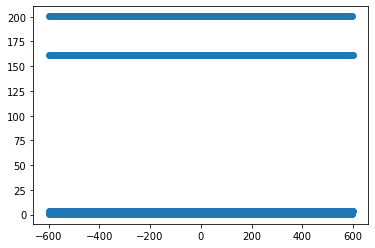

In [18]:
y_pred = nn.train(X, y)

In [19]:
y_pred

array([[ 0.01611173],
       [-0.11036405],
       [ 0.00576467],
       [-0.12147282]])

In [20]:
    """
        #Retorna a mesma matriz
        #teste = np.zeros((1,self.hidden))
        teste = []
        for i in range(4):
            for j in range(self.hidden):
                print(f"{X[i, :]}")
                print(f"{self.v[:, j]}")
                print(f"{self.bv[0, j]}")
                aux = (X[i,:] * self.v[:, j]) + self.bv[0, j]
                print(f'{i}:{j} = {aux}')
                teste.extend(aux)
                
        return teste
        """

'\n    #Retorna a mesma matriz\n    #teste = np.zeros((1,self.hidden))\n    teste = []\n    for i in range(4):\n        for j in range(self.hidden):\n            print(f"{X[i, :]}")\n            print(f"{self.v[:, j]}")\n            print(f"{self.bv[0, j]}")\n            aux = (X[i,:] * self.v[:, j]) + self.bv[0, j]\n            print(f\'{i}:{j} = {aux}\')\n            teste.extend(aux)\n            \n    return teste\n    '